In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Data/Data5.csv')

data.head()

,X1,X2,Y,
0,1,71,1,NaN
1,75,48,0,NaN
2,12,62,1,NaN
3,32,62,1,NaN
4,25,5,0,NaN


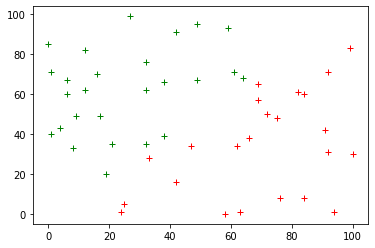

In [5]:
import matplotlib.pyplot as plt
X1 = data['X1'].values.tolist()
X2 = data['X2'].values.tolist()
Y = data['Y'].values.tolist()

for i in range(len(Y)): 
  if Y[i] == 0: 
    plt.plot(X1[i], X2[i], 'r+')
  else: 
    plt.plot(X1[i], X2[i], 'g+')

In [7]:
import random
import math
from IPython import display

<Figure size 432x288 with 0 Axes>

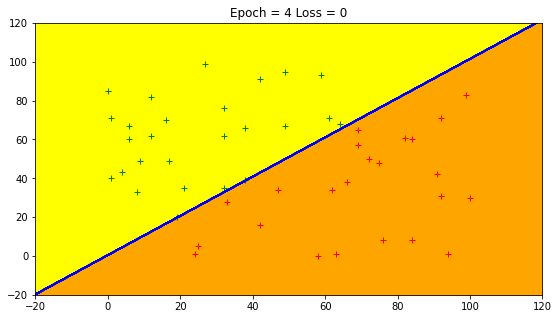

In [11]:
W = [random.random(), random.random()]
B = random.random()
lr = 0.001
theta = 0.5
epoch = 0
count = 0

while count < len(Y): 
  total_error = 0
  for i in range(len(Y)): 
    weighted_sum = W[0]*X1[i] + W[1]*X2[i] + B
    prediction = 0
    if weighted_sum > theta:  #activation function
      prediction = 1
    error = Y[i] - prediction
    if error != 0:  
      count = 0
      total_error += math.sqrt(error**2)
      W[0] += error*X1[i]*lr
      W[1] += error*X2[i]*lr
      B += error * lr
    else: 
      count += 1


  plt.figure()
  grf = plt.figure(figsize=(20,5))
  ax = grf.add_subplot(1,2,1)
  display.clear_output(wait=True)

  for i in range(len(Y)): 
    if Y[i] == 0: 
      plt.plot(X1[i], X2[i], 'r+')
      
    else: 
      plt.plot(X1[i], X2[i], 'g+')
     

    plt.xlim([-20, 120])
    plt.ylim([-20, 120])
   

    xintercept = (theta - B) / W[0]
    yintercept = (theta - B) / W[1]
    slope = -yintercept / xintercept
    x = plt.xlim()
    y = []

    
    for i in x: 
      y.append(slope*i + yintercept) #y = mx + c
    
    plt.plot(x,y, 'b-')
    ax.fill_between(x, y, plt.xlim()[0], color='orange', alpha= 0.5)
    ax.fill_between(x, y, plt.ylim()[1], color='yellow', alpha = 0.5)
    
    plt.title(f"Epoch = {epoch} Loss = {total_error}")


  # plt.rcParams['axes.facecolor'] = 'orange'
  plt.show()


  epoch += 1
